In [1]:
import Oanda
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, timedelta
plt.style.use('seaborn')

In [2]:
oanda = Oanda.Oanda()
today = date.today()
startDate = today - timedelta(days=365*4)
spx_data = oanda.getHistoricalData("SPX500_USD",startDate, today,"D" )
btc_data = oanda.getHistoricalData("BTC_USD",startDate, today,"D" )

<Response [200]>
<Response [200]>


Betrachtungs Zeitraum Heute - 4 Jahre bis Heute

In [3]:
def createFeatures(data:pd.DataFrame) -> pd.DataFrame:
    data["Weekly_Return"] = ((data["close"] - data["open"].shift(7))/data["open"].shift(7))  * 100
    data["Daily_candel"] = (data["close"] - data["open"])/data["open"]
    data["log_close"] =np.log(data["close"]/data["open"])


In [4]:
createFeatures(spx_data)
createFeatures(btc_data)

<AxesSubplot:>

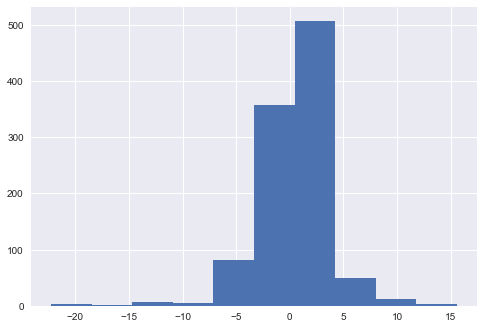

In [5]:
spx_data["Weekly_Return"].hist()

<AxesSubplot:>

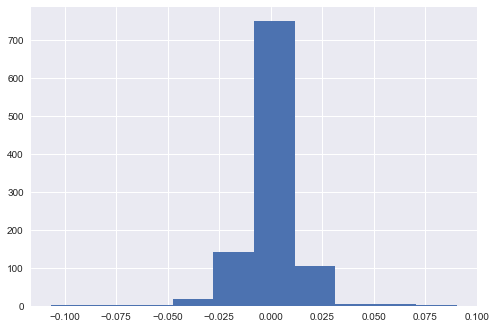

In [6]:
spx_data["Daily_candel"].hist()

<AxesSubplot:>

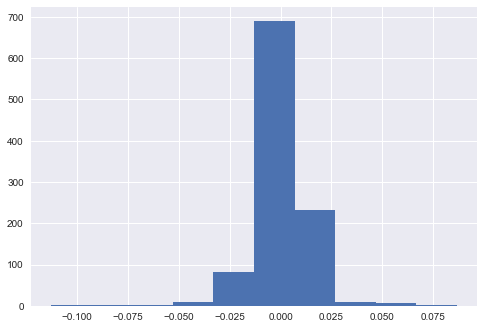

In [7]:
spx_data["log_close"].hist()

<AxesSubplot:>

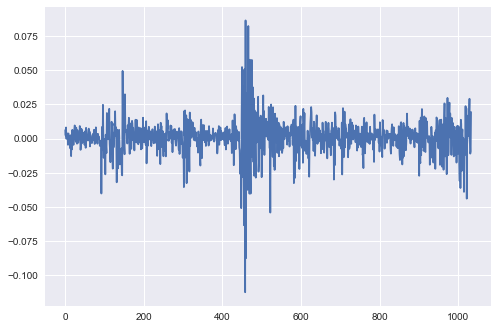

In [8]:
spx_data["log_close"].plot()

<AxesSubplot:>

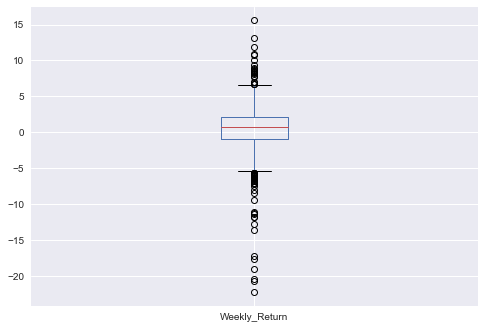

In [9]:
spx_data.boxplot(column=["Weekly_Return"], return_type="axes")

<AxesSubplot:>

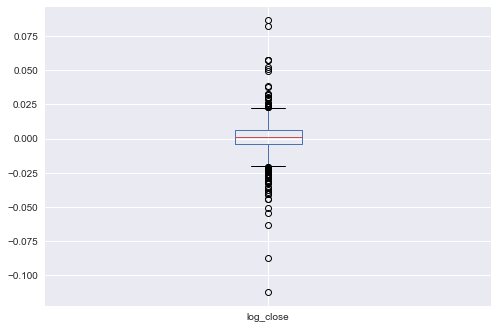

In [10]:
spx_data.boxplot(column=["log_close"], return_type="axes")

<AxesSubplot:>

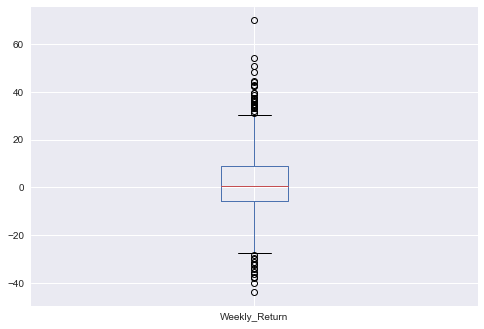

In [11]:
btc_data.boxplot(column=["Weekly_Return"], return_type="axes")

<AxesSubplot:>

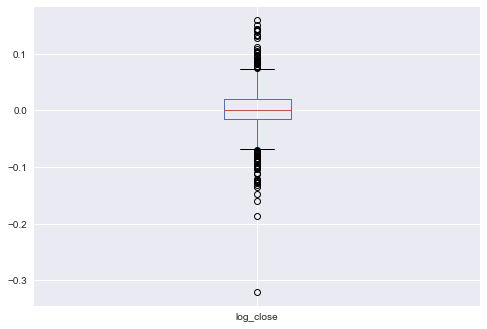

In [12]:
btc_data.boxplot(column=["log_close"], return_type="axes")

In [13]:
def boxPlotYearReturns(df: pd.DataFrame):
    """
    Create Columns for every year - weekly return

    Args:
        df (pd.DataFrame): Dataframe with column Weekly_Return
    """
    df_year = df[df["Year"] == 2018]
    df_year = df_year.rename(columns={"Weekly_Return": "Weekly_Return_"+str(2018)})
    df_year_len = len(df_year)
    for year in range(2019,2022):
        df_year_zw = df[df["Year"] == year]
        df_year_zw = df_year_zw["Weekly_Return"].tolist()
        while(len(df_year_zw) > df_year_len):
            df_year_zw = df_year_zw[:-1]
        if len(df_year_zw) < df_year_len:
            for _ in range(df_year_len - len(df_year_zw)):
                df_year_zw.append(np.nan)
            
        df_year["Weekly_Return_"+str(year)] = df_year_zw
    return df_year

In [14]:
year_df_btc = boxPlotYearReturns(btc_data)

Text(0, 0.5, 'Änderung in %')

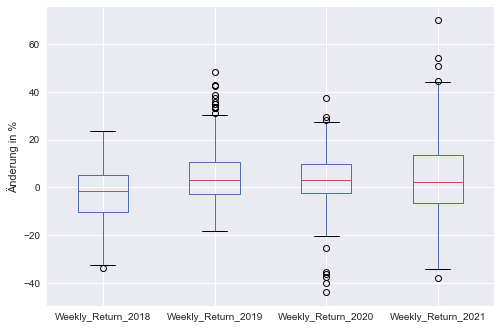

In [20]:
bplot = year_df_btc.boxplot(column=["Weekly_Return_2018","Weekly_Return_2019","Weekly_Return_2020","Weekly_Return_2021"], return_type="axes")
bplot.set_ylabel('Änderung in %')

In [16]:
def countOutliers(column: pd.Series)->int:
    q75 = column.quantile(.75)
    q25 = column.quantile(.25)
    iqr = q75 - q25
    fence_high = q75 + 1.5*iqr
    column=column[column > fence_high]
    print(len(column))

In [17]:
countOutliers(year_df_btc["Weekly_Return_2019"])

12


Text(0, 0.5, 'Änderung in %')

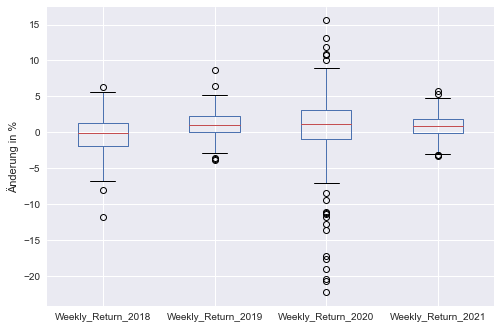

In [19]:
from matplotlib import pyplot as plt
year_df_spx = boxPlotYearReturns(spx_data)
bplot = year_df_spx.boxplot(column=["Weekly_Return_2018","Weekly_Return_2019","Weekly_Return_2020","Weekly_Return_2021"], return_type="axes")
bplot.set_ylabel('Änderung in %')